# Support Vector Machines - SVMs
## Laboratorio 3

## [Fraude en el Vino](https://en.wikipedia.org/wiki/Wine_fraud)

El fraude en el vino se relaciona a los aspectos comerciales del vino.  El tipo más prevalente de fraude es aquel en el cual los vinos son adulterados, generalmente con la adición de productos más baratos (e.g. jugos) y, a veces, con químicos dañinos y endulcorantes (para compensar el color o sabor).

La falsificación y la re-etiquetación de vinos inferiores y más baratos haciéndolos parecer marcas más caras es otro tipo común de fraude con vino.

<img src="wine.jpg">

## Objetivos del Laboratorio

Una compañía distribuidora, que recientemente fue víctima de fraude, ha completado una auditoría de varias muestras de vino a través del uso de análisis químico.  La compañía se especializa en la exportación de vinos de una calidad extremadamente alta y muy valiosos.  El fraude fue cometido por un proveedor que intentó pasar vinos baratos, de calidad inferior, como vinos de más alta gama.  La compañía distribuidora los ha contratado a Ustedes para intentar crear un modelo de aprendizaje de máquina (ML) que pueda ayudar a detectar muestras de vino de calidad baja ("fraude").  Quieren saber si siquiera es posible detectar tal diferencia.  


Fuente de datos: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by datos mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**La meta general es utilizar el conjunto de datos adjunto para desarrollar un modelo que intenta predecir si un vino es legítimo "Legit" o fraudulento "Fraud" basado en varias características químicas.**

---
---

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .datos y la forma de leerlo
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos

**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar el de mejor rendimiento
        
**(14 puntos) Hallazgos y conclusiones.**
* Hace la recomendación correcta para la Compañía Distribuidora

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('./wine_fraud.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


<h2>Analisis Exploratorio

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [ ]:

data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,Legit,white


**HeatMap**

<Axes: >

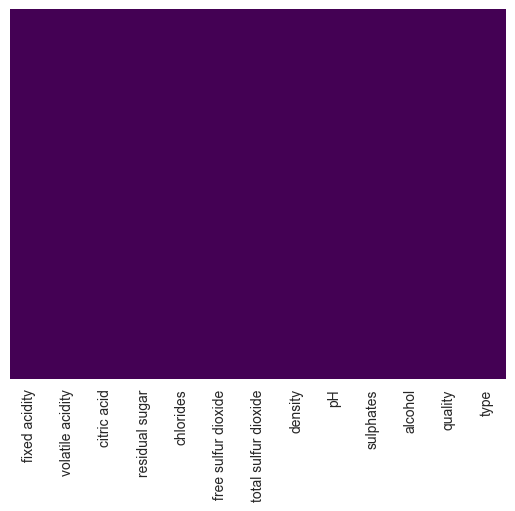

In [ ]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

De acuerdo con los resultados obtenidos de la investigación inicial del data set se puede observar que no hay datos faltantes en el mismo.

**Se puede observar las variables categoricas:**
- quality
- type


**Se puede observar las variables cuantitativas:**
- fixed acidity (continua)
- acidity (continua)
- citric acid  (continua)
- residual sugar (continua)
- chlorides (continua)
- free sulfur dioxide (discreta)
- total sulfur dioxide (discreta)
- density (continua)
- pH (continua)
- sulphates (continua)
- alcohol (continua)

In [ ]:
totalData = len(data)
redFraud = data.loc[(data['type'] == 'red') & (data['quality'] == 'Fraud'), 'quality'].count()
whiteFraud = data.loc[(data['type'] == 'white') & (data['quality'] == 'Fraud'), 'quality'].count()

print(totalData)
print(redFraud)
print(whiteFraud)


6497
63
183


Podemos decir que de 6497 elementos 63 son Fraud de vinos rojos y 183 son Fraud  de vinos blancos.

<h1>Graficos Realizados<h1>

**Grafico de pastel**

Con este gráfico podemos visualizar el porcentaje de calidad de los vinos, en el cual se encontró que el 96.2% de los datos son legítimos y el 3.8% son fraude

**Grafico de Barras**

Con este grafico podemos visualizar la cantidad de datos que son de tipo legítimo y fraude, además de categorizar y filtrar los datos por su tipo, en este caso Vino Rojo y Blanco. 

De acuerdo con los resultados podemos notar que la cantidad de vinos no legítimos es mayor en los vinos blancos que en los rojos. 

**Histogramas**

Con este grafico podemos visualizar la frecuencia de los datos que son de una variable de tipo cuantitativa.

**Grafico de caja y bigotes**

Con este grafico podemos visualizar la distribucion de los datos que son de una variable de tipo cuantitativo con respecto al tipo de vino que sea el dato (red, white).

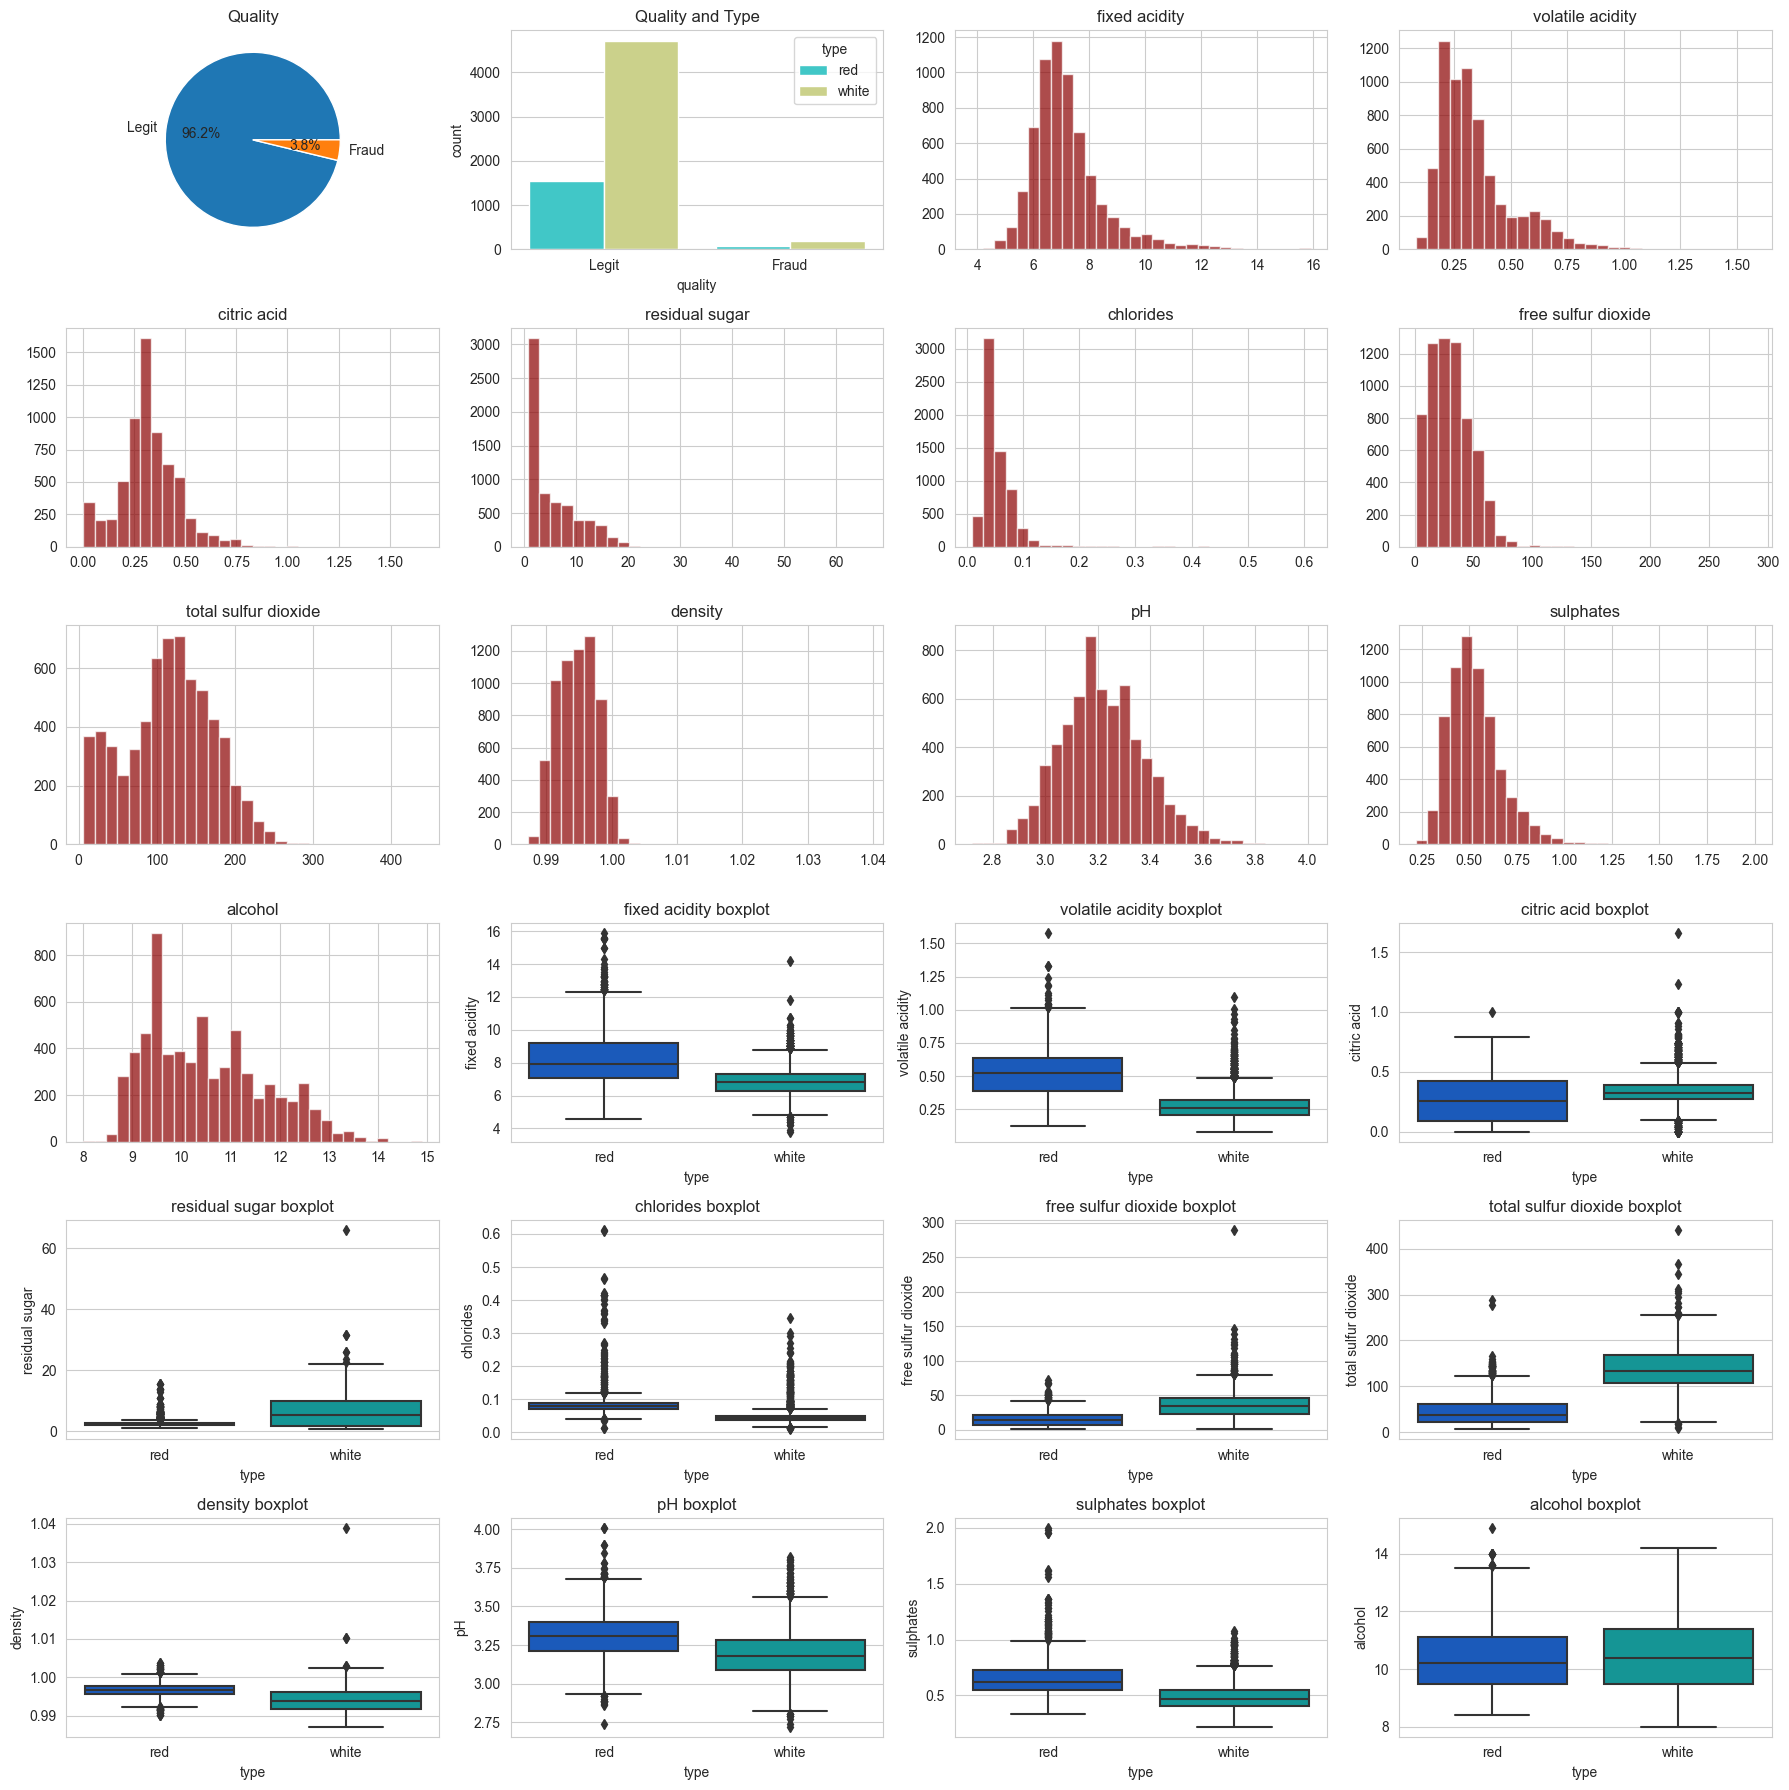

In [ ]:
# create figure and axes objects
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(18, 18))

# plot pie chart
axs[0][0].pie(data['quality'].value_counts(), labels=['Legit', 'Fraud'], autopct='%1.1f%%')
axs[0][0].set_title('Quality')

# plot countplot
sns.countplot(x='quality', hue='type', data=data, palette='rainbow', ax=axs[0][1])
axs[0][1].set_title('Quality and Type')

# plot histograms and boxplots
columns = data.columns[0:-2]
for i, column in enumerate(columns):
    # plot histogram
    ax1 = axs[(i+2)//4][(i+2)%4]
    data[column].hist(bins=30, color='darkred', alpha=0.7, ax=ax1)
    ax1.set_title(column)

    # plot boxplot
    ax2 = plt.subplot(6, 4, i+3+len(columns))
    sns.boxplot(x='type', y=column, data=data, palette='winter', ax=ax2)
    ax2.set_title(column + ' boxplot')

plt.tight_layout()
plt.show()



**Estadística descriptiva**

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


**Correlación de variables**

In [ ]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


<Axes: >

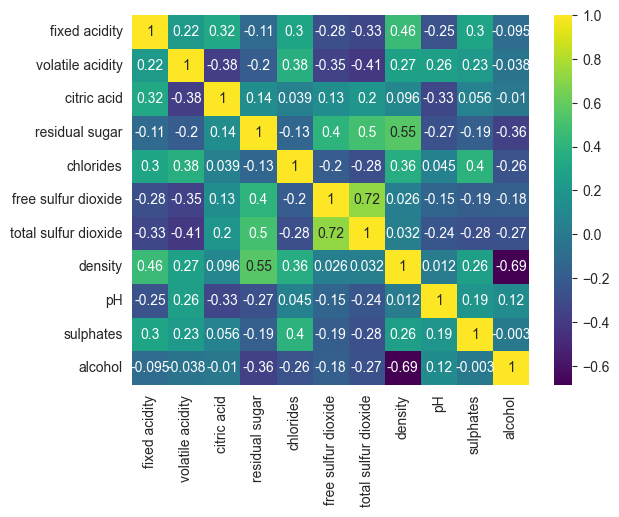

In [ ]:
sns.heatmap(data.corr(),cmap = 'viridis', annot = True)


**Limpieza de datos**

Conversión de variables cuantitativas de float a int, debido a que no tenemos valores decimales en estos datos

In [ ]:
data['free sulfur dioxide']=data['free sulfur dioxide'].astype(int)
data['total sulfur dioxide']=data['total sulfur dioxide'].astype(int)

**Eliminación de columna 'type'**

Se ha decidido eliminar esta columna ya que consideramos que son datos no relevantes a considerar en nuestros modelos de clasificación. 

In [ ]:
data = data.drop('type', axis=1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,Legit
1,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,Legit
2,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,Legit
3,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,Legit
4,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,Legit
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,Legit
6493,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,Legit
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,Legit
6495,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,Legit


**Manejo de datos categoricos**

Se decidió convertir los datos categoricos a una notación binaria para mantener un formato numerico en todo el arreglo brindado para la creacion de los modelos.

In [ ]:
data['quality'] = data['quality'].replace({'Legit': 0, 'Fraud': 1})
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,0


<h2>Clasificación

**División de datos de entreno y prueba**

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.30, random_state = 0)

**Normalización**

In [ ]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
X_entreno = normalizador.fit_transform(X_entreno)
X_prueba = normalizador.transform(X_prueba)

Cristian:
- Naive Bayes
- Kernel SVM
- KNN

Maco: 
- Logistica
- SVM

### Regresión Logistica
Se realiza el modelo de regresión logistica con el data set.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

WineLogReg = LogisticRegression(max_iter = 500)
WineLogReg.fit(X_entreno,y_entreno)
prediccionesLogRed = WineLogReg.predict(X_prueba)
classification_report(y_prueba, prediccionesLogRed)

In [ ]:
confusion_matrix(y_prueba,WineLogReg)

In [ ]:
accuracy_score(y_prueba, WineLogReg)

### SVM 
modelo normal de svm

In [ ]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
X_entreno_norm = normalizador.fit_transform(X_entreno)
X_prueba_norm = normalizador.transform(X_prueba)

In [ ]:
from sklearn.svm import SVR, LinearSVR
WineBaseSVM = SVR()

In [ ]:
WineBaseSVM.fit(X_entreno_norm,y_entreno)

In [ ]:
base_predicciones = WineBaseSVM.predict(X_prueba_norm)
classification_report(y_prueba, base_predicciones)

In [ ]:
confusion_matrix(y_prueba,WineBaseSVM)

In [ ]:
accuracy_score(y_prueba, WineBaseSVM)

En este caso no se considera necesario hacer un grid search pues la combinación de datos si llega a variar pero no existe una combinación que brinde un resultado optimo pues "n" cantidad de combinaciones de los hiper parametros solo brindarán el resultado de Fraud o Legit (0,1).

<h2>Hallazgos y conclusiones

**NOTA:  Al usar SVC, anteriormente hemos dejado el modelo en blanco, (e.g. sin parámeteros).  Sin embargo, en estos datos las clases no están balanceadas.  Para intentar remediar este problema, podemos ajustar automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos con una llamada en la invocación de SVC().  Ver la [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en-línea y averiguen cuál es el argumento\parámetro.**